哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
A_data = pd.read_csv(r'D:\ML100\不動產時價登入分析\A_lvr_land_A.csv')
B_data = pd.read_csv(r'D:\ML100\不動產時價登入分析\B_lvr_land_A.csv')
F_data = pd.read_csv(r'D:\ML100\不動產時價登入分析\F_lvr_land_A.csv')
E_data = pd.read_csv(r'D:\ML100\不動產時價登入分析\E_lvr_land_A.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print(A_data.head(5))
print(B_data.head(5))
print(E_data.head(5))
print(F_data.head(5))

                                    鄉鎮市區              交易標的  \
0  The villages and towns urban district  transaction sign   
1                                    文山區      房地(土地+建物)+車位   
2                                    文山區         房地(土地+建物)   
3                                    文山區         房地(土地+建物)   
4                                    中正區         房地(土地+建物)   

                                        土地區段位置建物區段門牌  \
0  land sector position building sector house num...   
1                                臺北市文山區忠順街二段85巷1~30號   
2                                   臺北市文山區福興路91~120號   
3                                臺北市文山區木柵路四段121~150號   
4                                 臺北市中正區和平西路一段31~60號   

                             土地移轉總面積平方公尺  \
0  land shifting total area square meter   
1                                  26.97   
2                                  10.32   
3                                  39.64   
4                                   4.26   

                         

In [4]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
AA = A_data.drop(index=[0])
BB = B_data.drop(index=[0])
EE = E_data.drop(index=[0])
FF = F_data.drop(index=[0])


In [5]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
AA['city'] = '台北市'
BB['city'] = '台中市'
EE['city'] = '高雄市'
FF['city'] = '新北市'

In [6]:
#4. 將以上四份資料運用pd.concat()串接
df = pd.concat([AA,FF,BB,EE], axis=0, ignore_index=True)
df.head(5)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,台北市
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,台北市
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,台北市
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,台北市
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,台北市


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59476 entries, 0 to 59475
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           59476 non-null  object 
 1   交易標的           59476 non-null  object 
 2   土地區段位置建物區段門牌   59476 non-null  object 
 3   土地移轉總面積平方公尺    59476 non-null  object 
 4   都市土地使用分區       54097 non-null  object 
 5   非都市土地使用分區      4306 non-null   object 
 6   非都市土地使用編定      4302 non-null   object 
 7   交易年月日          59476 non-null  object 
 8   交易筆棟數          59476 non-null  object 
 9   移轉層次           49724 non-null  object 
 10  總樓層數           49664 non-null  object 
 11  建物型態           59476 non-null  object 
 12  主要用途           47889 non-null  object 
 13  主要建材           49680 non-null  object 
 14  建築完成年月         48690 non-null  object 
 15  建物移轉總面積平方公尺    59476 non-null  object 
 16  建物現況格局-房       59476 non-null  object 
 17  建物現況格局-廳       59476 non-null  object 
 18  建物現況格局

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [8]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [9]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df_1 = df.rename(columns=columns_mapping)

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59476 entries, 0 to 59475
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   towns                       59476 non-null  object 
 1   transaction_sign            59476 non-null  object 
 2   house_number                59476 non-null  object 
 3   land_area_square_meter      59476 non-null  object 
 4   use_zoning                  54097 non-null  object 
 5   land_use_district           4306 non-null   object 
 6   land_use                    4302 non-null   object 
 7   tx_dt                       59476 non-null  object 
 8   transaction_pen_number      59476 non-null  object 
 9   shifting_level              49724 non-null  object 
 10  total_floor_number          49664 non-null  object 
 11  building_state              59476 non-null  object 
 12  main_use                    47889 non-null  object 
 13  main_materials              496

In [11]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df_1 = df_1[(df_1['main_use'] == '住家用') & (df_1['use_zoning'] == '住')]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7818 entries, 0 to 57834
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   towns                       7818 non-null   object 
 1   transaction_sign            7818 non-null   object 
 2   house_number                7818 non-null   object 
 3   land_area_square_meter      7818 non-null   object 
 4   use_zoning                  7818 non-null   object 
 5   land_use_district           1 non-null      object 
 6   land_use                    0 non-null      object 
 7   tx_dt                       7818 non-null   object 
 8   transaction_pen_number      7818 non-null   object 
 9   shifting_level              7818 non-null   object 
 10  total_floor_number          7812 non-null   object 
 11  building_state              7818 non-null   object 
 12  main_use                    7818 non-null   object 
 13  main_materials              7817

In [12]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
df_2 = df_1[['city','towns','main_use','use_zoning','total_price','building_area_square_meter','main_building_area','tx_dt','unit_price','room_number','hall_number','health_number']].dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 57834
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB


In [13]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df_2 = df_2.astype({'total_price': 'int','unit_price':'float','building_area_square_meter':'float','main_building_area': 'float','room_number': 'int','hall_number': 'int','health_number': 'int'})
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 57834
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int32  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   float64
 9   room_number                 7802 non-null   int32  
 10  hall_number                 7802 non-null   int32  
 11  health_number               7802 non-null   int32  
dtypes: float64(3), int32(4), object(5)
memory usage: 670.5+ KB


In [14]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
df_2['tx_dt_year'] = df_2['tx_dt'].str[0:3]

t1 = df_2['tx_dt_year'] == '109'
t2 = (df_2['room_number'] >=1) & (df_2['room_number'] <=5)
t3 = (df_2['hall_number'] >=1) & (df_2['hall_number'] <=2)

df_3 =df_2[(t1 & t2 & t3)].reset_index(drop=True)
df_3.head(5)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,台北市,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,台北市,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,台北市,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,台北市,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,台北市,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [15]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df_3['building_area_square_feet'] = df_3['building_area_square_meter']*0.3025
df_3['main_building_area_square_feet'] = df_3['main_building_area']*0.3025
df_3['unit_price_square_feet'] = df_3['unit_price']/0.3025

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            6894 non-null   object 
 1   towns                           6894 non-null   object 
 2   main_use                        6894 non-null   object 
 3   use_zoning                      6894 non-null   object 
 4   total_price                     6894 non-null   int32  
 5   building_area_square_meter      6894 non-null   float64
 6   main_building_area              6894 non-null   float64
 7   tx_dt                           6894 non-null   object 
 8   unit_price                      6894 non-null   float64
 9   room_number                     6894 non-null   int32  
 10  hall_number                     6894 non-null   int32  
 11  health_number                   6894 non-null   int32  
 12  tx_dt_year                      68

In [16]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?

# 敘述統計的結果可以發現總價total_price與單價unit_price存在0元共2筆，不符合現實交易情況，故選擇移除
df_3.describe()

del_data = (df_3['unit_price'] == 0) | (df_3['total_price'] == 0)
df_4 = df_3[~(del_data)]
print(df_4[df_4['unit_price'] == 0])
print(df_4[df_4['total_price'] == 0])

Empty DataFrame
Columns: [city, towns, main_use, use_zoning, total_price, building_area_square_meter, main_building_area, tx_dt, unit_price, room_number, hall_number, health_number, tx_dt_year, building_area_square_feet, main_building_area_square_feet, unit_price_square_feet]
Index: []
Empty DataFrame
Columns: [city, towns, main_use, use_zoning, total_price, building_area_square_meter, main_building_area, tx_dt, unit_price, room_number, hall_number, health_number, tx_dt_year, building_area_square_feet, main_building_area_square_feet, unit_price_square_feet]
Index: []


In [17]:
# 移除後再用.describe()觀察是否還有奇怪的資料? 沒有
df_4.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.892000e+03,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6.892000e+03
mean,1.139041e+07,121.713819,82.110488,94392.054991,2.850696,1.793239,1.733314,36.818430,24.838422,3.120399e+05
std,1.159452e+07,62.850341,37.342404,58303.607573,0.898520,0.405012,0.681006,19.012228,11.296077,1.927392e+05
min,1.000000e+05,1.030000,0.000000,3239.000000,1.000000,1.000000,0.000000,0.311575,0.000000,1.070744e+04
25%,5.580000e+06,82.975000,60.727500,53545.000000,2.000000,2.000000,1.000000,25.099937,18.370069,1.770083e+05
50%,8.555000e+06,109.390000,78.995000,79616.000000,3.000000,2.000000,2.000000,33.090475,23.895987,2.631934e+05
75%,1.330000e+07,147.472500,95.800000,118738.500000,3.000000,2.000000,2.000000,44.610431,28.979500,3.925240e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [18]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數 
# 和時價登入總價(total_price)高度相關的變數:1.建物移轉總面積 2.主建物面積

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
# 和單價元坪(unit_price_square_feet)高度相關的變數:單價元平方公尺


df_taipei = df_4[df_4['city'] == '台北市']
df_taipei.corr()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
total_price,1.000000,0.864705,0.710723,0.581492,0.324975,0.270233,0.598129,0.864705,0.710723,0.581492
building_area_square_meter,0.864705,1.000000,0.836974,0.218777,0.484897,0.379418,0.697921,1.000000,0.836974,0.218777
main_building_area,0.710723,0.836974,1.000000,0.113380,0.631454,0.464695,0.657850,0.836974,1.000000,0.113380
unit_price,0.581492,0.218777,0.113380,1.000000,-0.100680,0.004619,0.127933,0.218777,0.113380,1.000000
room_number,0.324975,0.484897,0.631454,-0.100680,1.000000,0.509640,0.544750,0.484897,0.631454,-0.100680
hall_number,0.270233,0.379418,0.464695,0.004619,0.509640,1.000000,0.405658,0.379418,0.464695,0.004619
health_number,0.598129,0.697921,0.657850,0.127933,0.544750,0.405658,1.000000,0.697921,0.657850,0.127933
building_area_square_feet,0.864705,1.000000,0.836974,0.218777,0.484897,0.379418,0.697921,1.000000,0.836974,0.218777
main_building_area_square_feet,0.710723,0.836974,1.000000,0.113380,0.631454,0.464695,0.657850,0.836974,1.000000,0.113380
unit_price_square_feet,0.581492,0.218777,0.113380,1.000000,-0.100680,0.004619,0.127933,0.218777,0.113380,1.000000


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

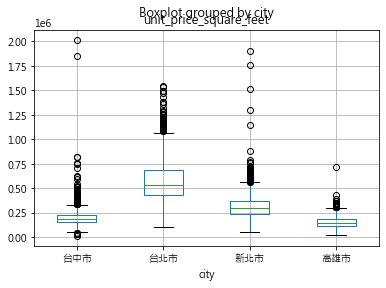

In [19]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
#台北市中位數最高
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #顯示中文
plt.rcParams['axes.unicode_minus'] = False

df_4.boxplot(column='unit_price_square_feet',by='city')


<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

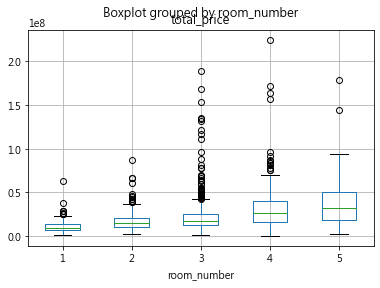

In [20]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
#5個房間為中位數最高的房間數
df_taipei = df_4[df_4['city'] == '台北市']
df_taipei.boxplot(column='total_price',by='room_number')

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns_le_inve'>

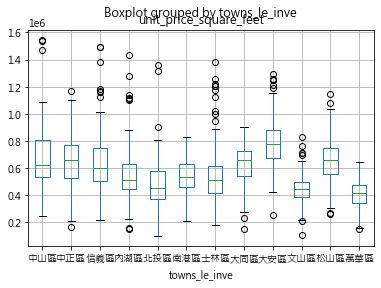

In [21]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

#單價元坪大安區中位數最高
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_taipei_le=pd.DataFrame(df_taipei)

df_taipei_le['towns_le'] = le.fit_transform(df_taipei_le['towns'])
df_taipei_le['towns_le_inve'] = le.inverse_transform(df_taipei_le['towns_le'])
df_taipei_le.boxplot(column='unit_price_square_feet', by='towns_le_inve')